# View Northeast Pacific SST based on an Ensemble Empirical Mode Decomposition

The oscillation of sea surface temperature (SST) has substantial impacts on the global climate. For example, anomalously high SST near the equator (between 5°S and 5°N and the Peruvian coast) causes the El Niño phenomenon, while low SST in this area brings about the La Niña phenomenon, both of which impose considerable inﬂuence on temperature, precipitation and wind globally.

In this notebook, an adaptive and temporal local analysis method, the recently developed ensemble empirical mode decomposition (EEMD) method (Huang and Wu 2008; Wu and Huang 2009) is applied to study the oscillation of SST over Northeast Pacific(40°–50°N, 150°–135°W). The EEMD is the most recent improvement of the EMD method (Huang et al. 1998; Huang and Wu 2008). The package of [PyEMD](https://pyemd.readthedocs.io/en/latest/index.html) is used, which is a Python implementation of Empirical Mode Decomposition (EMD) and its variations. One of the most popular expansion is Ensemble Empirical Mode Decomposition (EEMD), which utilises an ensemble of noise-assisted executions. As a result of EMD one will obtain a set of components that possess oscillatory features. In case of plain EMD algorithm, these are called Intrinsic Mode Functions (IMFs) as they are expected to have a single mode. In contrary, EEMD will unlikely produce pure oscillations as the effects of injected noise can propagate throughout the decomposition.

The SST data is extracted from the lastest version of Extended Reconstructed Sea Surface Temperature (ERSST) dataset, version5. It is a global monthly sea surface temperature dataset derived from the International Comprehensive Ocean–Atmosphere Dataset (ICOADS). Production of the ERSST is on a 2° × 2° grid. For more information see https://www.ncdc.noaa.gov/data-access/marineocean-data/extended-reconstructed-sea-surface-temperature-ersst-v5.

## 1. Load all needed libraries

In [1]:
%matplotlib inline

import xarray as xr
from PyEMD import EEMD
import numpy as np
import pylab as plt

plt.rcParams['figure.figsize'] = (9,5)

matplotlib inline


## 2. Load SST data

### 2.1 Load time series SST

Select the region (40°–50°N, 150°–135°W) and the period(1981-2016)

In [2]:
ds = xr.open_dataset('data\sst.mnmean.v5.nc')
sst = ds.sst.sel(lat=slice(50, 40), lon=slice(190, 240), time=slice('1981-01-01','2015-12-31'))
#sst.mean(dim='time').plot()

### 2.2 Calculate climatology between 1981-2010

In [3]:
sst_clm = sst.sel(time=slice('1981-01-01','2010-12-31')).groupby('time.month').mean(dim='time')
#sst_clm = sst.groupby('time.month').mean(dim='time')

### 2.3 Calculate SSTA

In [4]:
sst_anom = sst.groupby('time.month') - sst_clm
sst_anom_mean = sst_anom.mean(dim=('lon', 'lat'), skipna=True)

## 3. Carry out EMD analysis

In [5]:
S = sst_anom_mean.values
t = sst.time.values
# Assign EEMD to `eemd` variable
eemd = EEMD()
# Execute EEMD on S
eIMFs = eemd.eemd(S)

## 4. Visualize

### 4.1 Plot IMFs

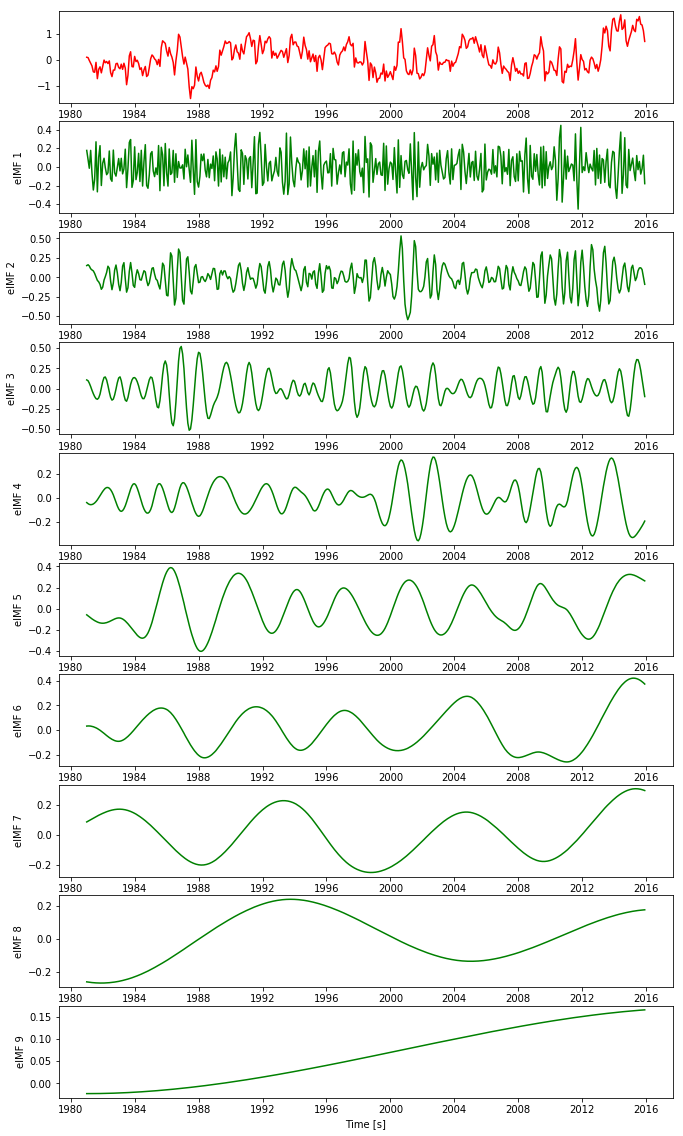

In [6]:
nIMFs = eIMFs.shape[0]
plt.figure(figsize=(11,20))
plt.subplot(nIMFs+1, 1, 1)

# plot original data
plt.plot(t, S, 'r')

# plot IMFs
for n in range(nIMFs):
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(t, eIMFs[n], 'g')
    plt.ylabel("eIMF %i" %(n+1))
    plt.locator_params(axis='y', nbins=5)

plt.xlabel("Time [s]")

### 4.2 Error of reconstruction

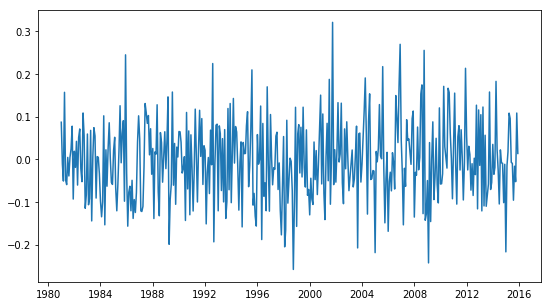

In [7]:
reconstructed = eIMFs.sum(axis=0)
plt.plot(t, reconstructed-S)

### 4.3 Summary

Using the EEMD method, the original SSTA sequence is decomposed into nine modes, including eight IMFs and the remainder mode, R (IMF9). It is observed that the frequencies of night IMFs decrease successively and the corresponding periods increase. Also, the remainder mode, R, is monotonically increasing, in accordance with the upward trend of the original SSTA data.

Obviously, the modes IMF4–IMF8 are intrinsically regular in time since they have their own characteristic frequencies, while the characteristic frequencies of the first few IMFs, especially IMF1, are indistinct. In other words, the non-periodic and strongly stochastic properties of the original SSTA data are mainly inherited in the first several IMFs, while the regular components in the SSTA data are separated within the other modes, such as IMF4–IMF8 and the remainder mode, R (IMF9).

## References

Dawid Laszuk (2017-), Python implementation of Empirical Mode Decomposition algorithm. http://www.laszukdawid.com/codes.

Boyin Huang, Peter W. Thorne, Viva F. Banzon, Tim Boyer, Gennady Chepurin, Jay H. Lawrimore, Matthew J. Menne, Thomas M. Smith, Russell S. Vose, and Huai-Min Zhang (2017): NOAA Extended Reconstructed Sea Surface Temperature (ERSST), Version 5. [indicate subset used]. NOAA National Centers for Environmental Information. doi:10.7289/V5T72FNM.

Huang, N. E., Z. Shen, S. R. Long, M. C. Wu, E. H. Shih, Q. Zheng, C. C. Tung, and H. H. Liu, 1998: The empirical mode decomposition and the Hilbert spectrum for nonlinear and nonstationary time series analysis. Proc. Roy. Soc. London, 454A, 903–995.

Huang, N. E., and Z. Wu, 2008: A review on Hilbert-Huang transform: Method and its applications to geophysical studies. Rev. Geophys., 46, RG2006, doi:10.1029/2007RG000228.

Wu, Z., E. K. Schneider, B. P. Kirtman, E. S. Sarachik, N. E. Huang, and C. J. Tucker, 2008: The modulated annual cycle: An alternative reference frame for climate anomalies. Climate Dyn., 31, 823–841. 